In [1]:
#importing required libraries and loading dataset
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
Mr=pd.read_csv('/content/mushroom.csv')
Mr

,Unnamed: 0,cap_shape,cap_surface,cap_color,bruises,odor,gill_attachment,gill_spacing,gill_size,gill_color,...,veil_type,veil_color,ring_number,ring_type,spore_print_color,population,habitat,class,stalk_height,cap_diameter
0,1167,sunken,scaly,white,no,anise,descending,distant,broad,pink,...,partial,brown,two,sheathing,chocolate,clustered,waste,poisonous,14.276173,5.054983
1,1037,sunken,fibrous,red,no,anise,notched,crowded,narrow,chocolate,...,universal,brown,two,sheathing,brown,numerous,waste,edible,3.952715,19.068319
2,309,flat,grooves,purple,yes,foul,descending,crowded,broad,purple,...,universal,yellow,two,sheathing,purple,abundant,waste,poisonous,9.054265,7.205884
3,282,bell,scaly,pink,yes,fishy,notched,close,broad,orange,...,partial,yellow,two,cobwebby,green,clustered,grasses,poisonous,5.226499,20.932692
4,820,flat,smooth,yellow,yes,musty,free,crowded,narrow,orange,...,universal,white,none,none,yellow,clustered,urban,poisonous,14.037532,12.545245
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1995,863,sunken,scaly,brown,yes,foul,attached,crowded,narrow,chocolate,...,partial,orange,one,flaring,purple,abundant,leaves,poisonous,5.877891,17.464145
1996,1160,sunken,scaly,purple,yes,musty,attached,distant,narrow,red,...,partial,white,one,zone,yellow,numerous,waste,poisonous,6.500840,13.501957
1997,265,convex,grooves,green,yes,fishy,notched,close,narrow,pink,...,partial,brown,two,evanescent,yellow,abundant,woods,poisonous,13.558064,11.270020
1998,411,bell,smooth,white,no,pungent,free,close,narrow,orange,...,universal,yellow,one,cobwebby,brown,solitary,woods,poisonous,11.092703,8.423199


In [2]:
#Expolatory data analysis
Mr.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 26 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Unnamed: 0                2000 non-null   int64  
 1   cap_shape                 2000 non-null   object 
 2   cap_surface               2000 non-null   object 
 3   cap_color                 2000 non-null   object 
 4   bruises                   2000 non-null   object 
 5   odor                      2000 non-null   object 
 6   gill_attachment           2000 non-null   object 
 7   gill_spacing              2000 non-null   object 
 8   gill_size                 2000 non-null   object 
 9   gill_color                2000 non-null   object 
 10  stalk_shape               2000 non-null   object 
 11  stalk_root                2000 non-null   object 
 12  stalk_surface_above_ring  2000 non-null   object 
 13  stalk_surface_below_ring  2000 non-null   object 
 14  stalk_co

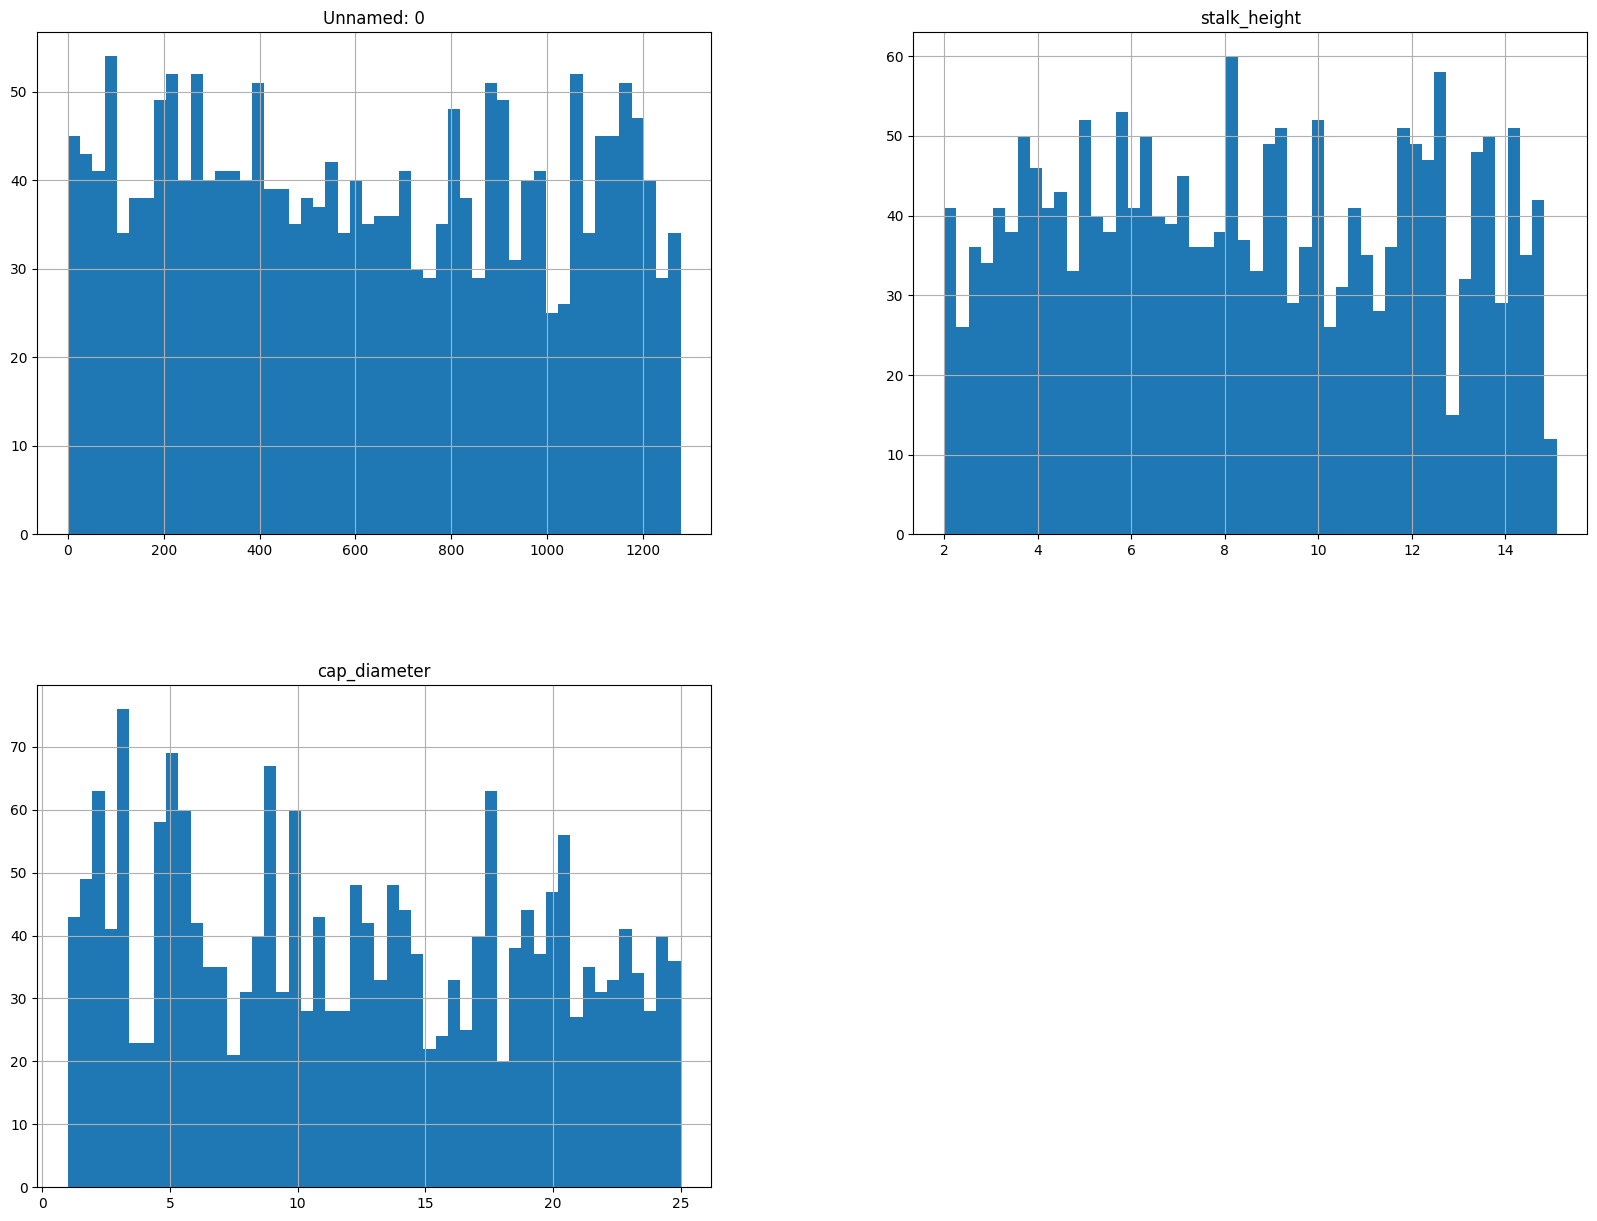

In [3]:
#plotting histogram
Mr.hist(bins=50,figsize=(20,15))
plt.show()

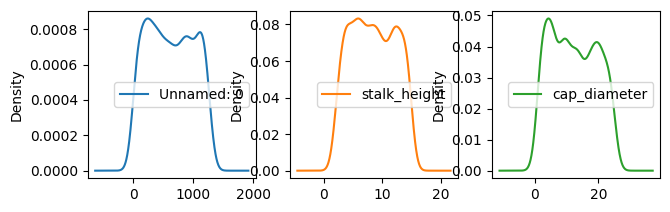

In [4]:
#density plot
Mr.plot(kind='density',subplots=True,layout=(4,4),sharex=False,figsize=(10,10))
plt.show()

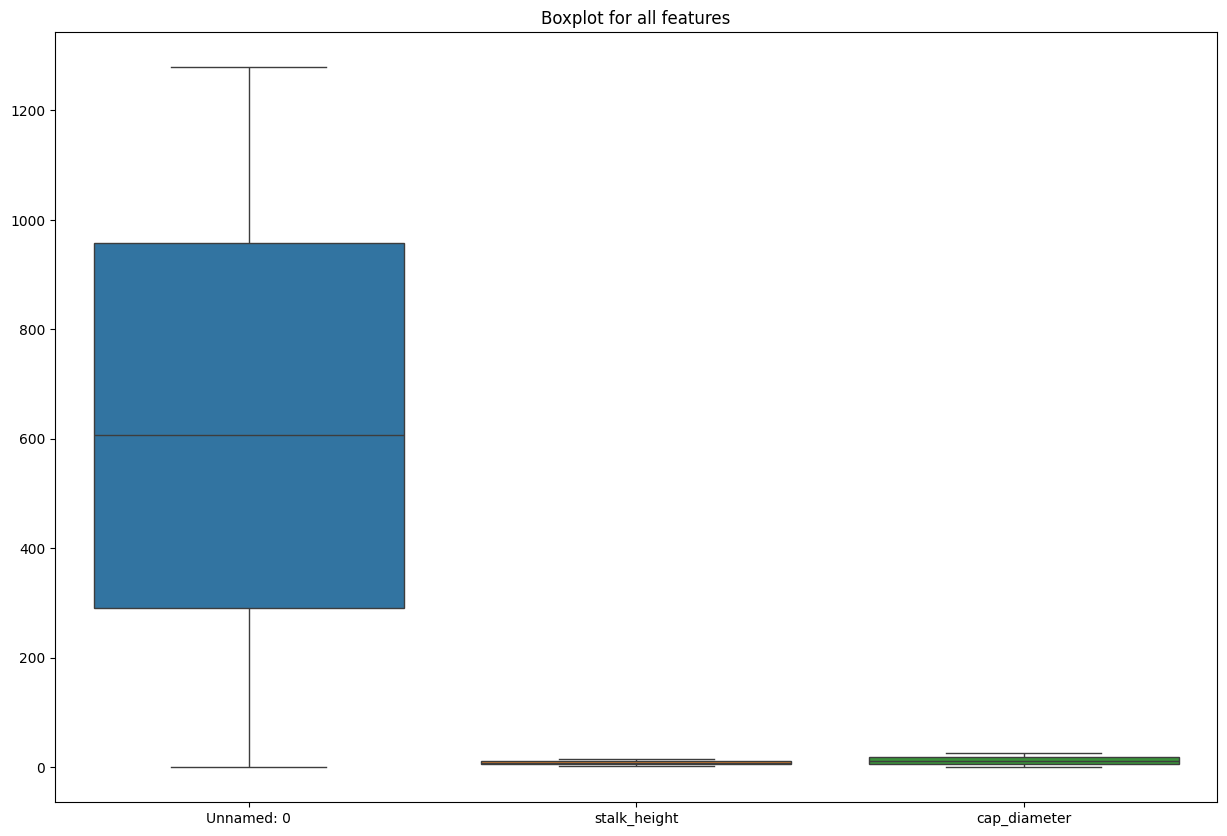

In [5]:
# Box plots
plt.figure(figsize=(15, 10))
sns.boxplot(data=Mr)
plt.title('Boxplot for all features')
plt.show()

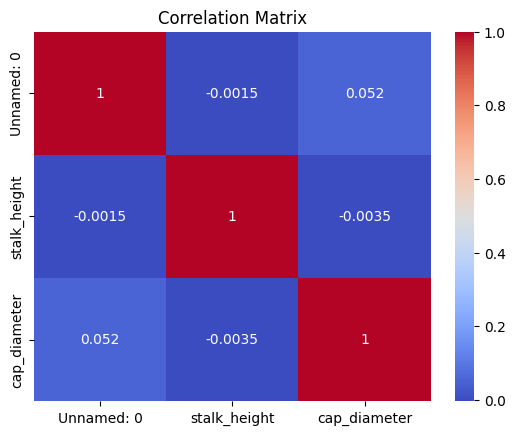

In [6]:
#plotting correlation heatmap
corr=Mr.corr(numeric_only=True)
sns.heatmap(corr,annot=True,cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

In [7]:
# Encoding categorical variables
Mr_encoded = pd.get_dummies(Mr, drop_first=True)
Mr_encoded.head()


,Unnamed: 0,stalk_height,cap_diameter,cap_shape_conical,cap_shape_convex,cap_shape_flat,cap_shape_sunken,cap_surface_grooves,cap_surface_scaly,cap_surface_smooth,...,population_scattered,population_several,population_solitary,habitat_leaves,habitat_meadows,habitat_paths,habitat_urban,habitat_waste,habitat_woods,class_poisonous
0,1167,14.276173,5.054983,False,False,False,True,False,True,False,...,False,False,False,False,False,False,False,True,False,True
1,1037,3.952715,19.068319,False,False,False,True,False,False,False,...,False,False,False,False,False,False,False,True,False,False
2,309,9.054265,7.205884,False,False,True,False,True,False,False,...,False,False,False,False,False,False,False,True,False,True
3,282,5.226499,20.932692,False,False,False,False,False,True,False,...,False,False,False,False,False,False,False,False,False,True
4,820,14.037532,12.545245,False,False,True,False,False,False,True,...,False,False,False,False,False,False,True,False,False,True


In [8]:
#Splitting the dataset into training and testing sets
from sklearn.model_selection import train_test_split

# Separate features and target variable
X = Mr_encoded.drop('class_poisonous', axis=1)
y = Mr_encoded['class_poisonous']

# Split the data (80% training, 20% testing)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [9]:
#Implementing a basic SVM classifier
from sklearn.svm import SVC

# Initialize SVM classifier
svm_model = SVC(kernel='linear', random_state=42)

# Train the model
svm_model.fit(X_train, y_train)

SVC(kernel='linear', random_state=42)

In [10]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report
y_pred = svm_model.predict(X_test)

# Evaluating  performance
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
report = classification_report(y_test, y_pred)

print(f"Accuracy: {accuracy}")
print(f"Precision: {precision}")
print(f"Recall: {recall}")
print(f"F1-Score: {f1}")
print(f"Classification Report:\n{report}")


Accuracy: 0.675
Precision: 0.6846361185983828
Recall: 0.951310861423221
F1-Score: 0.7962382445141066
Classification Report:
              precision    recall  f1-score   support

       False       0.55      0.12      0.20       133
        True       0.68      0.95      0.80       267

    accuracy                           0.68       400
   macro avg       0.62      0.54      0.50       400
weighted avg       0.64      0.68      0.60       400



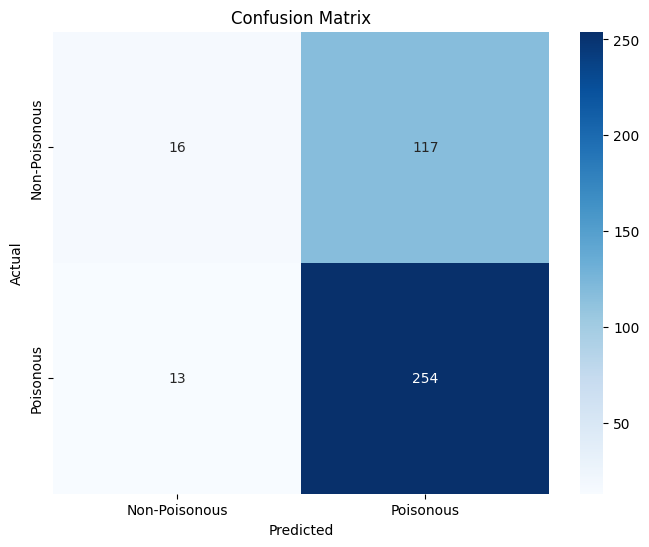

In [11]:
#Visualization of SVM Results
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Creating confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Plot confusion matrix using seaborn heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=['Non-Poisonous', 'Poisonous'],
            yticklabels=['Non-Poisonous', 'Poisonous'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

In [12]:
#Parameter Tuning and Optimization
from sklearn.model_selection import GridSearchCV

# Define parameter grid
param_grid = {
    'C': [0.1, 1],
    'kernel': ['linear', 'poly', 'rbf', 'sigmoid']
}

# Grid search
grid_search = GridSearchCV(SVC(), param_grid, refit=True, verbose=2, cv=5)
grid_search.fit(X_train, y_train)

# Best parameters
print(f"Best parameters found: {grid_search.best_params_}")

Fitting 5 folds for each of 8 candidates, totalling 40 fits
[CV] END ...............................C=0.1, kernel=linear; total time= 2.6min
[CV] END ...............................C=0.1, kernel=linear; total time= 2.2min
[CV] END ...............................C=0.1, kernel=linear; total time= 2.4min
[CV] END ...............................C=0.1, kernel=linear; total time= 1.5min
[CV] END ...............................C=0.1, kernel=linear; total time= 5.5min
[CV] END .................................C=0.1, kernel=poly; total time=   0.1s
[CV] END .................................C=0.1, kernel=poly; total time=   0.1s
[CV] END .................................C=0.1, kernel=poly; total time=   0.1s
[CV] END .................................C=0.1, kernel=poly; total time=   0.1s
[CV] END .................................C=0.1, kernel=poly; total time=   0.1s
[CV] END ..................................C=0.1, kernel=rbf; total time=   0.1s
[CV] END ..................................C=0.1,

In [14]:
# Initialize SVM classifiers with different kernels
kernels = ['linear', 'poly', 'rbf', 'sigmoid']
performances = {}

for kernel in kernels:
    svm = SVC(kernel=kernel, random_state=42)
    svm.fit(X_train, y_train)
    y_pred = svm.predict(X_test)
    performances[kernel] = {
        'Accuracy': accuracy_score(y_test, y_pred),
        'Precision': precision_score(y_test, y_pred),
        'Recall': recall_score(y_test, y_pred),
        'F1-Score': f1_score(y_test, y_pred)
    }

# Display results
performance_df = pd.DataFrame(performances)
print(performance_df)


             linear    poly     rbf   sigmoid
Accuracy   0.675000  0.6675  0.6675  0.595000
Precision  0.684636  0.6675  0.6675  0.685512
Recall     0.951311  1.0000  1.0000  0.726592
F1-Score   0.796238  0.8006  0.8006  0.705455
